In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
from datetime import datetime
from pgbm_model import pgbm_pred
import matplotlib.pyplot as plt
from preprocessing import get_nn_data
from lstm import build_model, make_pred
from plots_lstm import plot_loss, plot_comp 
from sklearn.metrics import mean_squared_error as mse 

In [2]:
CITY = 2304400
CITY_NAME = 'Fortaleza'
STATE = 'CE'
FILENAME_DATA = f'../../data/dengue_{CITY}_cluster.csv'

In [3]:
df_dengue = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_dengue.index = pd.to_datetime(df_dengue.index)
df_dengue

,casos_2304400,casos_est_2304400,casos_est_min_2304400,casos_est_max_2304400,p_rt1_2304400,p_inc100k_2304400,temp_min_2304400,temp_max_2304400,umid_min_2304400,pressao_min_2304400,...,casos_2306306,casos_est_2306306,casos_est_min_2306306,casos_est_max_2306306,p_rt1_2306306,p_inc100k_2306306,temp_min_2306306,temp_max_2306306,umid_min_2306306,pressao_min_2306306
2010-01-03,56,56.0,56,56,0.000000,2.08441,23.333333,28.333333,66.333333,1009.000000,...,0,0.0,0,0,0.000000,0.00000,23.333333,28.333333,66.333333,1009.000000
2010-01-10,55,55.0,55,55,0.000000,2.04719,24.714286,29.714286,59.571429,1009.428571,...,1,1.0,1,1,0.000000,1.88441,24.714286,29.714286,59.571429,1009.428571
2010-01-17,77,77.0,77,77,0.000000,2.86606,25.142857,30.571429,58.142857,1010.714286,...,0,0.0,0,0,0.000000,0.00000,25.142857,30.571429,58.142857,1010.714286
2010-01-24,56,56.0,56,56,0.000000,2.08441,24.714286,30.857143,54.142857,1009.000000,...,0,0.0,0,0,0.000000,0.00000,24.714286,30.857143,54.142857,1009.000000
2010-01-31,114,114.0,114,114,0.000000,4.24326,24.714286,30.571429,61.428571,1007.857143,...,0,0.0,0,0,0.000000,0.00000,24.714286,30.571429,61.428571,1007.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,1553,1711.0,1593,2050,0.050776,63.68620,23.857143,28.857143,72.411271,1009.857143,...,1,1.0,1,1,0.118655,1.88441,23.857143,28.857143,72.411271,1009.857143
2022-06-12,1234,1445.0,1287,1906,0.000001,53.78520,23.857143,28.571429,71.832614,1010.857143,...,1,1.0,1,1,0.296417,1.88441,23.857143,28.571429,71.832614,1010.857143
2022-06-19,778,1043.0,844,1779,0.000000,38.82210,24.571429,29.571429,61.422371,1012.000000,...,0,0.0,0,0,0.000000,0.00000,24.571429,29.571429,61.422371,1012.000000
2022-06-26,294,646.0,363,1750,0.000000,24.04520,24.142857,28.857143,64.995614,1011.000000,...,1,1.0,1,1,0.589271,1.88441,24.142857,28.857143,64.995614,1011.000000


## Neural network model 

Parameters of the models:

In [4]:
END_DATE = '2018-01-01' # assign the last day used to evaluate the dengue model 

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = df_dengue.shape[1] +1 # number of features 

Let's train the model with the loss function == msle 

Compilation Time :  0.002424001693725586
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 41)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3200      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0

2023-01-16 17:46:36.690175: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


261/261 [==============================] - 2s 4ms/step - loss: 0.0111 - accuracy: 0.2261 - mape: 120.0959 - mse: 0.0186 - val_loss: 0.0072 - val_accuracy: 0.2340 - val_mape: 106.0940 - val_mse: 0.0145
Epoch 2/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.2797 - mape: 89.3793 - mse: 0.0094 - val_loss: 0.0060 - val_accuracy: 0.2979 - val_mape: 107.6451 - val_mse: 0.0122
Epoch 3/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0038 - accuracy: 0.2720 - mape: 80.1003 - mse: 0.0070 - val_loss: 0.0056 - val_accuracy: 0.2766 - val_mape: 82.6528 - val_mse: 0.0116
Epoch 4/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0038 - accuracy: 0.2797 - mape: 82.2059 - mse: 0.0072 - val_loss: 0.0033 - val_accuracy: 0.2766 - val_mape: 73.0690 - val_mse: 0.0069
Epoch 5/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.3180 - mape: 73.0297 - mse: 0.0066 - val_loss: 0.0037 - val_accuracy:

Epoch 40/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.4483 - mape: 75.6794 - mse: 0.0036 - val_loss: 0.0018 - val_accuracy: 0.4468 - val_mape: 65.7247 - val_mse: 0.0038
Epoch 41/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.4291 - mape: 63.5996 - mse: 0.0027 - val_loss: 0.0014 - val_accuracy: 0.4468 - val_mape: 63.9755 - val_mse: 0.0033
Epoch 42/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.4981 - mape: 71.5140 - mse: 0.0028 - val_loss: 0.0016 - val_accuracy: 0.4043 - val_mape: 69.8360 - val_mse: 0.0035
Epoch 43/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.5249 - mape: 65.1839 - mse: 0.0024 - val_loss: 0.0015 - val_accuracy: 0.4255 - val_mape: 80.5822 - val_mse: 0.0035
Epoch 44/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.5096 - mape: 74.6703 - mse: 0.0030 - val_loss: 7.8226e-

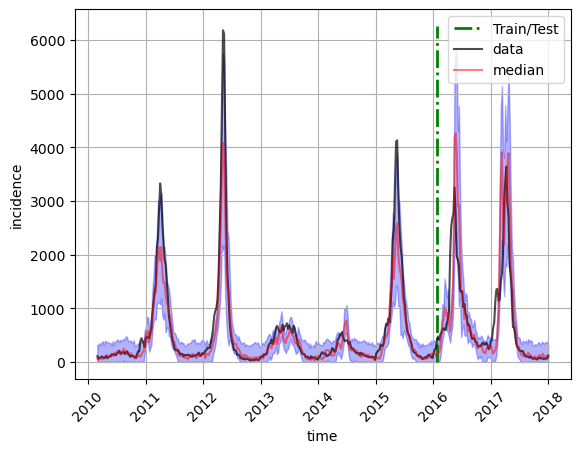

CPU times: user 2min 4s, sys: 7.83 s, total: 2min 12s
Wall time: 1min 53s


In [5]:
%%time

model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

metrics_msle, hist_msle, m_train, m_val = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 0.75, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle', filename = FILENAME_DATA)

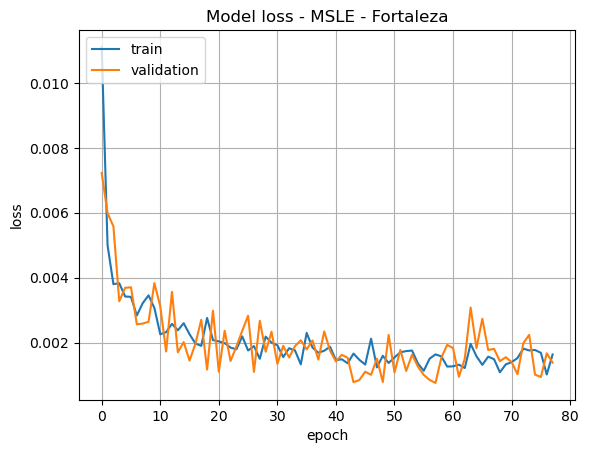

In [6]:
plot_loss(hist_msle, title = 'Model loss - MSLE - Fortaleza')

To specialize our lstm dengue model to predict better the peak of cases we propose a custom loss function. This function gives a weight of 10 to the predictions of ascending cases in the train data. 

This weight is given to the observations in the training data, where the fourth value is bigger than the second value of the target data. (Remember it is an array of length four since we forecast the next 4 observations).  

This functions is defined as: 

```
def custom_loss_msle(p = 1):
    """
    :param p: 
    """
    
    def my_loss_msle(y_true, y_pred):
        """
        :param y_true:
        :param y_pred: 
        """

        def f1(): 
            
            loss = tf.math.log(tf.math.add(y_true, 1)/ tf.math.add(y_pred, 1))
    
            loss = tf.square(loss)
        
            return tf.multiply(loss, p) 
        
        def f2(): 
            
            loss = tf.math.log(tf.math.add(y_true, 1)/ tf.math.add(y_pred, 1))
    
            loss = tf.square(loss)
        
            return loss

        msle = tf.cond(tf.less(tf.gather(y_true, 0)[1],tf.gather(y_true, 0)[3]) , 
                                     true_fn = f1,
                                     false_fn = f2 )

        return tf.reduce_mean(msle) 
    
    return my_loss_msle 
```

Let's train the model with a custom loss function:

Compilation Time :  0.0013072490692138672
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 41)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3200      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

Epoch 33/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.4023 - mape: 76.8861 - mse: 0.0043 - val_loss: 0.0145 - val_accuracy: 0.3404 - val_mape: 61.4464 - val_mse: 0.0049
Epoch 34/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0108 - accuracy: 0.3678 - mape: 74.2754 - mse: 0.0051 - val_loss: 0.0054 - val_accuracy: 0.3617 - val_mape: 67.4237 - val_mse: 0.0021
Epoch 35/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.3793 - mape: 68.6126 - mse: 0.0044 - val_loss: 0.0158 - val_accuracy: 0.2979 - val_mape: 111.5574 - val_mse: 0.0046
Epoch 36/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.4023 - mape: 75.5731 - mse: 0.0055 - val_loss: 0.0177 - val_accuracy: 0.3404 - val_mape: 72.7734 - val_mse: 0.0061
Epoch 37/400
261/261 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.4215 - mape: 76.8100 - mse: 0.0050 - val_loss: 0.0137 

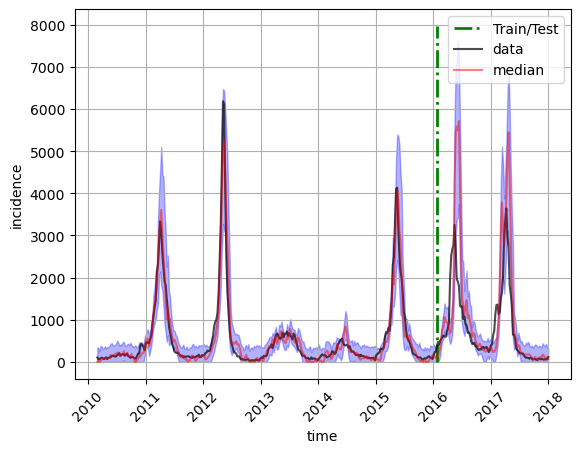

In [7]:
from lstm import custom_loss_msle

model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = custom_loss_msle(p=10))

metrics_c_msle, hist_c_msle, m_c_train, m_c_val = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 0.75, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'custom_msle', filename = FILENAME_DATA)

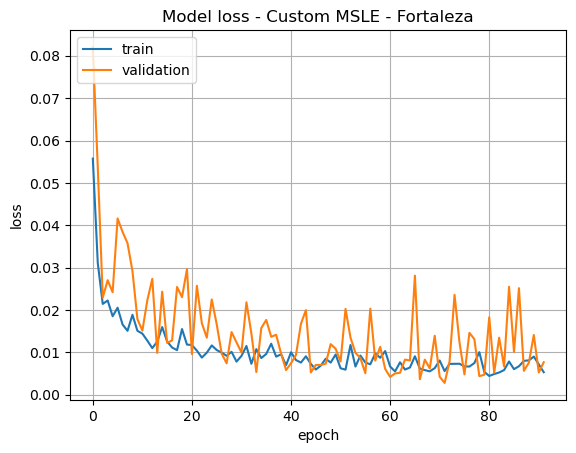

In [8]:
plot_loss(hist_c_msle, title = 'Model loss - Custom MSLE - Fortaleza')

Comparing the performance of the strategies:

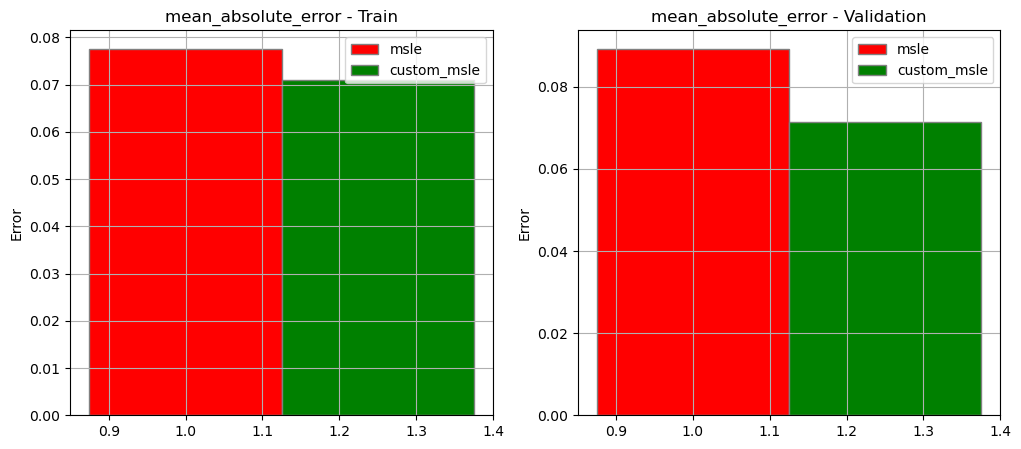

In [9]:
plot_comp(m_train, m_c_train,m_val, m_c_val, metric = 'mean_absolute_error')

Now, let's retrain the models with all the data available to apply the transfer learning step later:

Compilation Time :  0.0012907981872558594
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 41)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3200      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

Epoch 33/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.5057 - mape: 71.0525 - mse: 0.0040 - val_loss: 0.0037 - val_accuracy: 0.5000 - val_mape: 55.6946 - val_mse: 0.0080
Epoch 34/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.5029 - mape: 74.0682 - mse: 0.0039 - val_loss: 0.0039 - val_accuracy: 0.4516 - val_mape: 54.8731 - val_mse: 0.0088
Epoch 35/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.5115 - mape: 69.0801 - mse: 0.0035 - val_loss: 0.0028 - val_accuracy: 0.5000 - val_mape: 57.0974 - val_mse: 0.0064
Epoch 36/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.5029 - mape: 65.9180 - mse: 0.0030 - val_loss: 0.0034 - val_accuracy: 0.4516 - val_mape: 85.2665 - val_mse: 0.0079
Epoch 37/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.5230 - mape: 63.4087 - mse: 0.0035 - val_loss: 0.0040 -

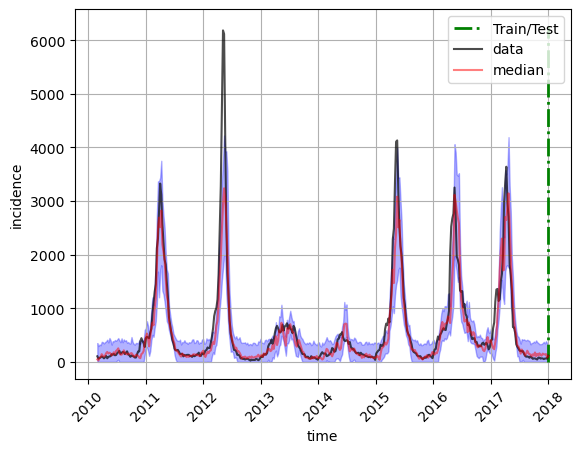

In [10]:
model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 1.0, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle_all',  filename = FILENAME_DATA)

Compilation Time :  0.0013880729675292969
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 41)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3200      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

Epoch 33/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0094 - accuracy: 0.3103 - mape: 72.2838 - mse: 0.0050 - val_loss: 0.0164 - val_accuracy: 0.2903 - val_mape: 64.3335 - val_mse: 0.0058
Epoch 34/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.3161 - mape: 78.4666 - mse: 0.0056 - val_loss: 0.0346 - val_accuracy: 0.2419 - val_mape: 61.7514 - val_mse: 0.0098
Epoch 35/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0111 - accuracy: 0.3391 - mape: 79.3983 - mse: 0.0055 - val_loss: 0.0272 - val_accuracy: 0.2419 - val_mape: 63.0680 - val_mse: 0.0082
Epoch 36/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 0.3362 - mape: 71.2701 - mse: 0.0051 - val_loss: 0.0150 - val_accuracy: 0.3387 - val_mape: 62.7371 - val_mse: 0.0056
Epoch 37/400
348/348 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.3218 - mape: 72.2725 - mse: 0.0054 - val_loss: 0.0144 -

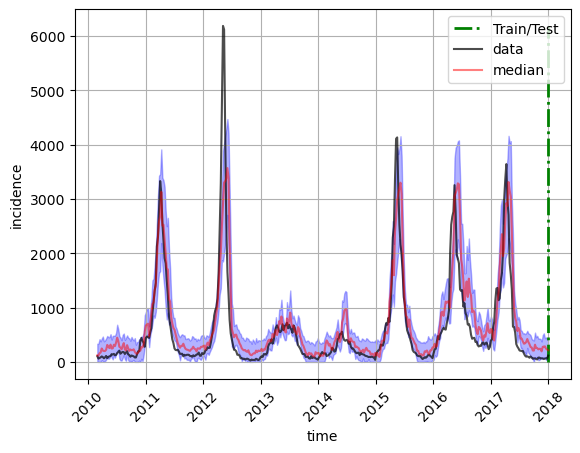

In [11]:
model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = custom_loss_msle(p=10))

m_c_msle_all, h_c_msle_all, m_c_train_all, m_c_val_all = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 1.0, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'custom_msle_all',  filename = FILENAME_DATA)

PGBM model

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Estimator 0/100, Train metric: 813.4342
Estimator 1/100, Train metric: 745.2271
Estimator 2/100, Train metric: 683.1336
Estimator 3/100, Train metric: 626.9969
Estimator 4/100, Train metric: 575.9006
Estimator 5/100, Train metric: 529.2480
Estimator 6/100, Train metric: 487.0909
Estimator 7/100, Train metric: 448.9431
Estimator 8/100, Train metric: 414.1298
Estimator 9/100, Train metric: 381.9996
Estimator 10/100, Train metric: 352.1898
Estimator 11/100, Train metric: 325.1872
Estimator 12/100, Train metric: 300.4857
Estimator 13/100, Train metric: 278.1420
Estimator 14/100, Train metric: 257.5924
Estimator 15/100, Train metric: 238.7865
Estimator 16/100, Train metric: 221.4737
Estimator 17/100, Train metric: 205.6569
Estimator 18/100, Train metric: 191.2540
Estimator 19/100, Train metric: 178.1376
Estimator 20/100, Train metric: 166.1452
Estimator 21/100, Train metric: 155.2668
Estimator 22/100, Train metric: 144.4891
Estimator 23/100, Train metric: 134.5822
Estimator 24/100, Train me

Estimator 5/100, Train metric: 534.3876
Estimator 6/100, Train metric: 491.7915
Estimator 7/100, Train metric: 453.4304
Estimator 8/100, Train metric: 419.4728
Estimator 9/100, Train metric: 387.0748
Estimator 10/100, Train metric: 357.7915
Estimator 11/100, Train metric: 331.7504
Estimator 12/100, Train metric: 307.8691
Estimator 13/100, Train metric: 286.0190
Estimator 14/100, Train metric: 266.0622
Estimator 15/100, Train metric: 247.7246
Estimator 16/100, Train metric: 230.9603
Estimator 17/100, Train metric: 215.7117
Estimator 18/100, Train metric: 201.0016
Estimator 19/100, Train metric: 186.9849
Estimator 20/100, Train metric: 174.2206
Estimator 21/100, Train metric: 163.0614
Estimator 22/100, Train metric: 150.9240
Estimator 23/100, Train metric: 141.6729
Estimator 24/100, Train metric: 133.3827
Estimator 25/100, Train metric: 125.2443
Estimator 26/100, Train metric: 117.9653
Estimator 27/100, Train metric: 111.6502
Estimator 28/100, Train metric: 105.4824
Estimator 29/100, Tra

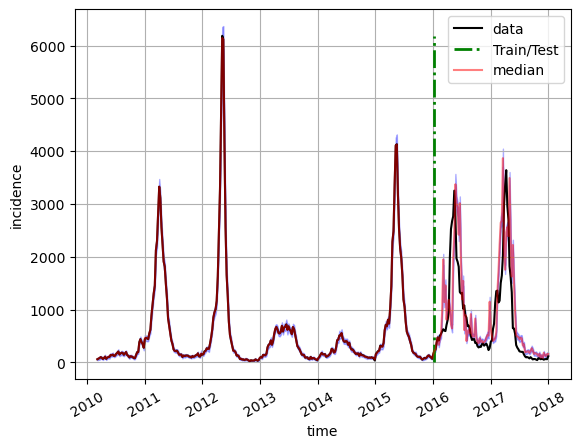

In [12]:

preds, preds25, preds975, X_train, targets = pgbm_pred(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK,
                                                           doenca = 'dengue', ratio = 0.75, ini_date = None,
                                                           end_date = END_DATE, label = 'train_test',  filename = FILENAME_DATA)

Estimator 0/100, Train metric: 816.6880
Estimator 1/100, Train metric: 746.4791
Estimator 2/100, Train metric: 682.6622
Estimator 3/100, Train metric: 625.0617
Estimator 4/100, Train metric: 572.7962
Estimator 5/100, Train metric: 525.1774
Estimator 6/100, Train metric: 482.2390
Estimator 7/100, Train metric: 442.5419
Estimator 8/100, Train metric: 406.7979
Estimator 9/100, Train metric: 374.4691
Estimator 10/100, Train metric: 344.6303
Estimator 11/100, Train metric: 317.3568
Estimator 12/100, Train metric: 292.5760
Estimator 13/100, Train metric: 270.2963
Estimator 14/100, Train metric: 249.9857
Estimator 15/100, Train metric: 231.1873
Estimator 16/100, Train metric: 214.1578
Estimator 17/100, Train metric: 198.8484
Estimator 18/100, Train metric: 184.9591
Estimator 19/100, Train metric: 172.3454
Estimator 20/100, Train metric: 159.3745
Estimator 21/100, Train metric: 148.9665
Estimator 22/100, Train metric: 139.4430
Estimator 23/100, Train metric: 129.2957
Estimator 24/100, Train me

Estimator 5/100, Train metric: 532.6176
Estimator 6/100, Train metric: 490.5197
Estimator 7/100, Train metric: 452.2518
Estimator 8/100, Train metric: 418.1261
Estimator 9/100, Train metric: 385.7630
Estimator 10/100, Train metric: 357.2645
Estimator 11/100, Train metric: 329.8800
Estimator 12/100, Train metric: 305.0652
Estimator 13/100, Train metric: 282.4400
Estimator 14/100, Train metric: 261.7874
Estimator 15/100, Train metric: 243.3904
Estimator 16/100, Train metric: 227.0060
Estimator 17/100, Train metric: 210.7780
Estimator 18/100, Train metric: 195.4516
Estimator 19/100, Train metric: 181.5209
Estimator 20/100, Train metric: 168.5949
Estimator 21/100, Train metric: 157.0011
Estimator 22/100, Train metric: 146.2580
Estimator 23/100, Train metric: 136.3244
Estimator 24/100, Train metric: 127.3384
Estimator 25/100, Train metric: 118.8965
Estimator 26/100, Train metric: 111.9188
Estimator 27/100, Train metric: 105.8986
Estimator 28/100, Train metric: 100.2179
Estimator 29/100, Tra

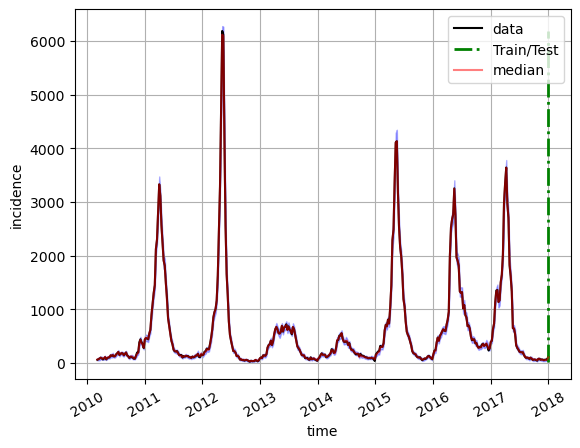

In [13]:
preds, preds25, preds975, X_train, targets = pgbm_pred(CITY, STATE, PREDICT_N, LOOK_BACK, doenca = 'dengue', ini_date = None, end_train_date = END_DATE, end_date = END_DATE,  filename = FILENAME_DATA)
   